In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as  pd
%run funciones.ipynb

In [53]:
df = pd.read_csv("dataset_mop.csv", encoding="ISO-8859-1")

# Renombrar columnas

In [54]:
%run renombrar_columnas.ipynb

# Missing values antes de la limpieza

In [55]:
percent_missing = df.isnull().sum()  * 100 / len(df)
percent_missing

proyecto_id                  0.000000
numero_obra                  0.000000
codigo_bapin                 0.000000
fecha_inicio                 0.000000
fecha_fin                    0.000000
nombre_obra                  0.000000
descripcion_fisica           2.202473
monto_total                  0.000000
sector_id                    0.000000
sector_nombre                0.000000
avance_financiero            0.000000
avance_fisico                0.000000
entidad_ejecutora_id         0.000000
entidad_ejecutora_nombre     2.743431
duracion_obra                0.000000
plazo_dias                  16.460587
objetivo_general             2.202473
tipo_proyecto                0.000000
depto                        0.000000
provincia                    0.000000
codigo_bahra                16.460587
etapa_obra                   0.193199
numero_saf                  74.188563
moneda_id                    0.000000
dtype: float64

# Limpiar valores

In [56]:
%run limpieza.ipynb

# Distribucion de las obras en las provincias

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_76895/3446495427.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


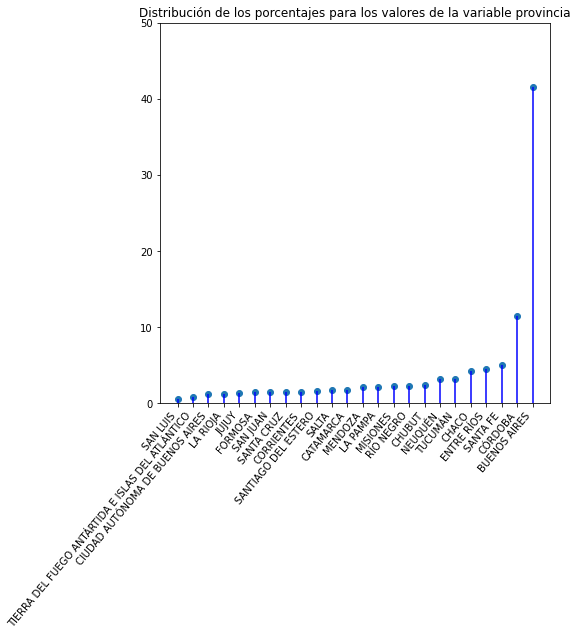

In [57]:
draw_distr(df, "provincia", maxy=50)

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_76895/3446495427.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


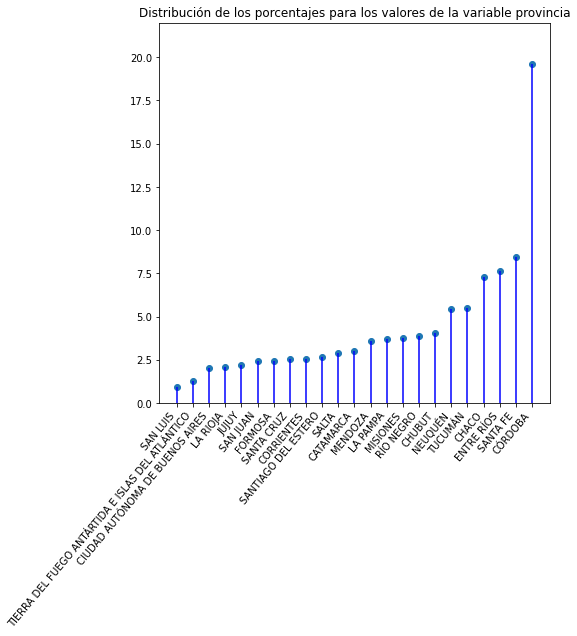

In [58]:
df_sin_bsas = df[df["provincia"] != "BUENOS AIRES"]
draw_distr(df_sin_bsas, "provincia", maxy=22)

# Distribucion de las obras por sector

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_76895/3446495427.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


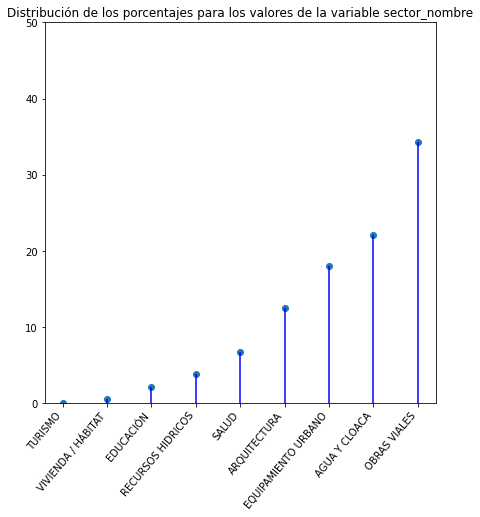

In [59]:
draw_distr(df, "sector_nombre", maxy=50)

# Ver descripcion / summary general del DF

In [60]:
_df = df[["plazo_dias","duracion_obra", "monto_total", "avance_financiero", "avance_fisico"]].describe()
_df["plazo_dias"] = _df["plazo_dias"].astype(int)
ladf = _df.style.set_properties(**{'text-align': 'left'})
ladf

,plazo_dias,duracion_obra,monto_total,avance_financiero,avance_fisico
count,2588,2588.000000,2588.000000,2588.000000,2588.000000
mean,373,1.041345,310515865.815294,50.310587,48.112403
std,586,1.770629,1409304132.230583,32.736939,40.923329
min,-1825,-5.000000,0.000000,0.000000,0.000000
25%,120,0.000000,8715823.000000,30.000000,0.000000
50%,180,0.000000,20783765.000000,40.000000,40.920000
75%,365,1.000000,85932667.250000,86.432500,98.565000
max,4932,14.000000,33805989178.000000,100.000000,100.000000


In [61]:
_df = df[["proyecto_id", "numero_obra", "monto_total", "sector_id", "codigo_bapin"]].describe()
_df["proyecto_id"] = _df["proyecto_id"].astype(int)
_df["sector_id"] = _df["sector_id"].astype(int)
_df["numero_obra"] = _df["numero_obra"].astype(int)
ladf = _df.style.set_properties(**{'text-align': 'left'})
ladf

,proyecto_id,numero_obra,monto_total,sector_id
count,2588,2588,2588.000000,2588
mean,711316361,88601,310515865.815294,1006
std,447174685,59990,1409304132.230583,6
min,161476,0,0.000000,1001
25%,16970107,4524,8715823.000000,1002
50%,1003107919,107920,20783765.000000,1004
75%,1003124949,124950,85932667.250000,1009
max,1003500002,500002,33805989178.000000,1026


# Busquemos información del proyecto que tiene duración en días negativa

In [62]:
df[df["duracion_obra"] < 0]

,proyecto_id,numero_obra,codigo_bapin,fecha_inicio,fecha_fin,nombre_obra,descripcion_fisica,monto_total,sector_id,sector_nombre,...,duracion_obra,plazo_dias,objetivo_general,tipo_proyecto,depto,provincia,codigo_bahra,etapa_obra,numero_saf,moneda_id
20,165471,71,SC471,2021-01-01,2016-01-31,RED SECUNDARIA CLOACAL BARRIO ROLDÁN,El objetivo de la obra es la construcción de l...,110339261.0,1001,AGUA Y CLOACA,...,-5,-1825.0,El objetivo de la obra es la construcción de l...,RED SECUNDARIA,LOMAS DE ZAMORA,BUENOS AIRES,NaN,EN EJECUCION,NaN,ARS


# Busquemos información del proyecto que tiene monto_total == 0

In [63]:
df[df["monto_total"] == 0]

,proyecto_id,numero_obra,codigo_bapin,fecha_inicio,fecha_fin,nombre_obra,descripcion_fisica,monto_total,sector_id,sector_nombre,...,duracion_obra,plazo_dias,objetivo_general,tipo_proyecto,depto,provincia,codigo_bahra,etapa_obra,numero_saf,moneda_id
1820,1003112267,112267,0000,2020-01-01,2020-01-31,HOSPITAL MODULAR GENERAL RODRIGUEZ,Realizado por donaciones. El mencionado plan p...,0.0,1026,SALUD,...,0,0.0,Realizado por donaciones. El mencionado plan p...,HOSPITAL,GENERAL RODRÍGUEZ,BUENOS AIRES,NaN,CONTRATADA,NaN,ARS


# Distribucion de las duraciones de las obras en años

<AxesSubplot:title={'center':'Distribución de las duraciones de las obras (en años)'}, ylabel='Frequency'>

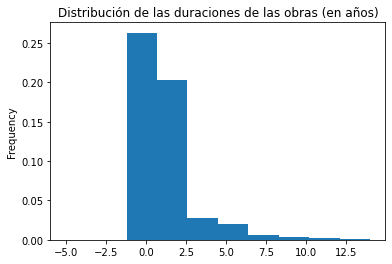

In [64]:
df["duracion_obra"].plot(kind="hist", density=True, title="Distribución de las duraciones de las obras (en años)")

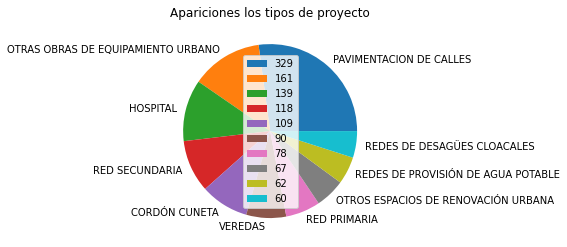

In [65]:
#df = df.sort_values(by="tipo_proyecto", ascending=True)
df_top_10 = df.groupby(['tipo_proyecto']).size().reset_index(name='counts').sort_values(by="counts", ascending=False)[:10]
df_top_10["counts"] = pd.to_numeric(df_top_10["counts"])
#draw_distr(df_top_10, "counts")
plt.pie(df_top_10["counts"], labels=df_top_10["tipo_proyecto"])
plt.title("Apariciones los tipos de proyecto")
plt.legend(df_top_10["counts"],loc="center")

# Analicemos los missing values

In [66]:
percent_missing = df.isnull().sum()  * 100 / len(df)
percent_missing
df[df["etapa_obra"].isnull()]#[["avance_financiero", "avance_fisico"]]

,proyecto_id,numero_obra,codigo_bapin,fecha_inicio,fecha_fin,nombre_obra,descripcion_fisica,monto_total,sector_id,sector_nombre,...,duracion_obra,plazo_dias,objetivo_general,tipo_proyecto,depto,provincia,codigo_bahra,etapa_obra,numero_saf,moneda_id
529,16270236,236,SA70236,2019-01-01,2020-01-31,INTERVENCIONES ESPECIALES Y PUESTA EN SERVICIO...,NaN,7285951.0,1001,AGUA Y CLOACA,...,1,365.0,NaN,OTROS,ALMIRANTE BROWN,BUENOS AIRES,NaN,NaN,NaN,ARS
530,16270241,241,SA70241,2019-01-01,2020-01-31,INTERVENCIONES ESPECIALES Y PUESTA EN SERVICIO...,NaN,4908372.0,1001,AGUA Y CLOACA,...,1,365.0,NaN,OTROS,AVELLANEDA,BUENOS AIRES,NaN,NaN,NaN,ARS
582,16670056,56,NA70056,2019-01-01,2020-01-31,CIERRE DE MALLA RINCON DE MILBERG MOD 3,Instalación de red secundaria de agua en: Sec...,8012201.0,1001,AGUA Y CLOACA,...,1,365.0,Instalación de red secundaria de agua en: Sec...,RED SECUNDARIA,TIGRE,BUENOS AIRES,NaN,NaN,NaN,ARS
624,16870239,239,OC70239,2019-01-01,2020-01-31,RED SECUNDARIA CLOACAL ARCO IRIS NORTE M2,NaN,8720710.0,1001,AGUA Y CLOACA,...,1,365.0,NaN,RED SECUNDARIA,LA MATANZA,BUENOS AIRES,NaN,NaN,NaN,ARS
625,16870245,245,OC70245,2019-01-01,2020-01-31,RED SECUNDARIA CLOACAL CASTILLO 5 SE M2,NaN,9637285.0,1001,AGUA Y CLOACA,...,1,365.0,NaN,RED SECUNDARIA,LA MATANZA,BUENOS AIRES,NaN,NaN,NaN,ARS


# Analicemos los valores que son 0

In [67]:
df[df == 0].count(axis=0)/len(df.index)

proyecto_id                 0.000000
numero_obra                 0.000773
codigo_bapin                0.000000
fecha_inicio                0.000000
fecha_fin                   0.000000
nombre_obra                 0.000000
descripcion_fisica          0.000000
monto_total                 0.000386
sector_id                   0.000000
sector_nombre               0.000000
avance_financiero           0.105873
avance_fisico               0.268934
entidad_ejecutora_id        0.000000
entidad_ejecutora_nombre    0.000000
duracion_obra               0.500000
plazo_dias                  0.050618
objetivo_general            0.000000
tipo_proyecto               0.000000
depto                       0.000000
provincia                   0.000000
codigo_bahra                0.000000
etapa_obra                  0.000000
numero_saf                  0.000000
moneda_id                   0.000000
dtype: float64

In [68]:
# Ejemplos de entidad_ejecutora_nombre null
df[df["entidad_ejecutora_nombre"].isnull()][["proyecto_id", "entidad_ejecutora_id", "entidad_ejecutora_nombre"]]

,proyecto_id,entidad_ejecutora_id,entidad_ejecutora_nombre
690,152003009,1000,NaN
691,152016012,1000,NaN
692,152024009,1000,NaN
693,152025004,1000,NaN
694,152025005,1000,NaN
...,...,...,...
756,155119007,1000,NaN
757,155122009,1000,NaN
758,155125005,1000,NaN
759,155128005,1000,NaN


# Buscamos sectores id que tengan diferentes nombres

In [69]:
values_for_pair(df, "sector_id", "sector_nombre")

,sector_id,sector_nombre,cantidad_valores
0,1001,"[AGUA Y CLOACA, OBRAS VIALES]",2
1,1002,[ARQUITECTURA],1
2,1003,[EDUCACIÓN],1
3,1004,[EQUIPAMIENTO URBANO],1
4,1009,[OBRAS VIALES],1
5,1012,[VIVIENDA / HÁBITAT],1
6,1016,[RECURSOS HIDRICOS],1
7,1019,[TURISMO],1
8,1026,[SALUD],1


# Buscamos entidades ejecutoras id que tengan diferentes nombres

In [70]:
values_for_pair(df, "entidad_ejecutora_id", "entidad_ejecutora_nombre")

,entidad_ejecutora_id,entidad_ejecutora_nombre,cantidad_valores
0,1000,[nan],1
1,1001,[AUTORIDAD DE LA CUENCA MATANZA RIACHUELO],1
2,1012,[DIRECCIÓN NACIONAL DE VIALIDAD],1
3,1013,[ENTE NACIONAL DE OBRAS HÍDRICAS DE SANEAMIENTO],1
4,1024,[ORGANISMO PROVINCIAL DE JUJUY],1
5,1033,[MINISTERIO DE OBRAS PÚBLICAS],1
6,1055,[SECRETARÍA DE INFRAESTRUCTURA Y POLÍTICA HÍDR...,1
7,1056,[SSDUV],1
8,1057,[SUBSECRETARÍA DE OBRAS HIDRÁULICAS],1
9,1058,[SUBSECRETARÍA DE EJECUCIÓN DE OBRAS PÚBLICAS],1


# Análisis bivariado: plazo_dias vs duracion_obra

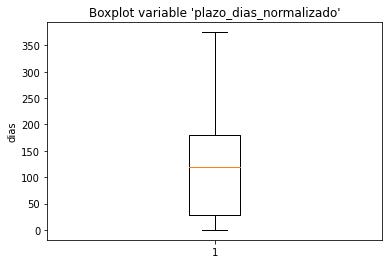

In [71]:
%run plazo_dias_vs_duracion_obra.ipynb

# Analisis univariado de avance financiero y avance fisico

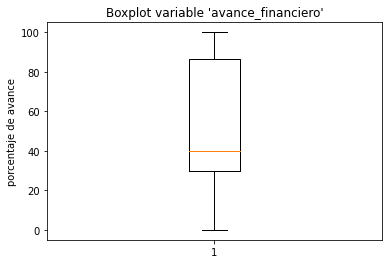

In [72]:
_df = df.copy()
draw_boxplot(_df, "avance_financiero", "porcentaje de avance")

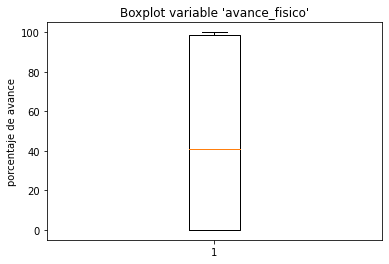

In [73]:
_df = df.copy()
draw_boxplot(_df, "avance_fisico", "porcentaje de avance")

# Distribucion etapas

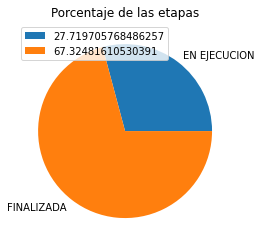

In [74]:
df_etapa = count_and_percent_by_column(df, "etapa_obra")
df_etapa = df_etapa[df_etapa["percent"]>10]
plt.pie(df_etapa["percent"], labels=["EN EJECUCION", "FINALIZADA"])
plt.title("Porcentaje de las etapas")
plt.legend(df_etapa["percent"],loc="upper left")

In [75]:
df[["etapa_obra"]]

,etapa_obra
0,FINALIZADA
1,FINALIZADA
2,FINALIZADA
3,FINALIZADA
4,FINALIZADA
...,...
2583,EN EJECUCION
2584,EN EJECUCION
2585,FINALIZADA
2586,EN EJECUCION


/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_76895/3446495427.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


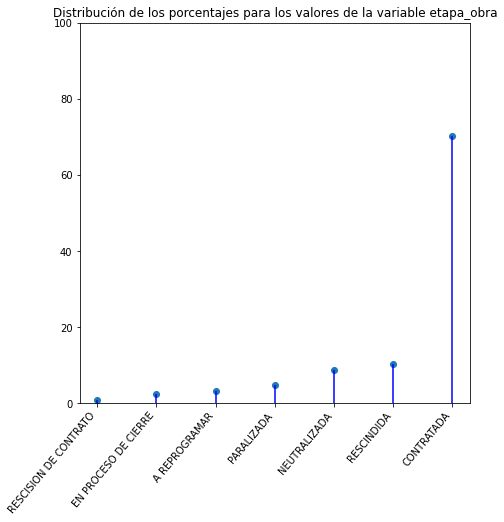

In [76]:
df_etapa = df[(df["etapa_obra"] != "EN EJECUCION") & (df["etapa_obra"] != "FINALIZADA")]
draw_distr(df_etapa, "etapa_obra", maxy=100)

# Distribución gastos entre las provincias

In [77]:
# Necesitamos cuánto se dio para cada provincia
df_biv1 = df[["monto_total", "provincia"]]
df_biv1 = df_biv1.groupby(['provincia'], as_index=False).sum()
df_biv1["monto_total"] = df_biv1["monto_total"] / 1000000

Text(0, 0.5, 'Gasto en pesos')

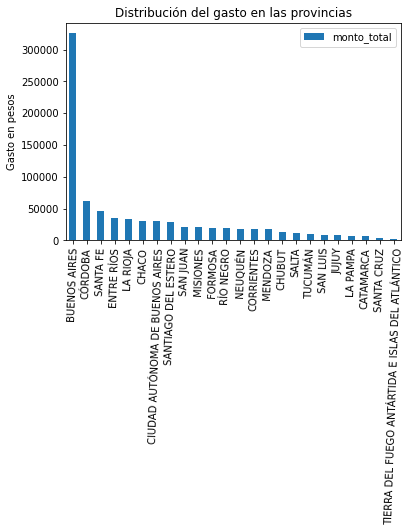

In [78]:
df_biv1.sort_values('monto_total', ascending=False).plot(kind='bar',x='provincia',y='monto_total', rot=88)
plt.title("Distribución del gasto en las provincias")
plt.xlabel("")
plt.ylabel("Gasto en pesos")

Text(0, 0.5, 'Gasto en pesos')

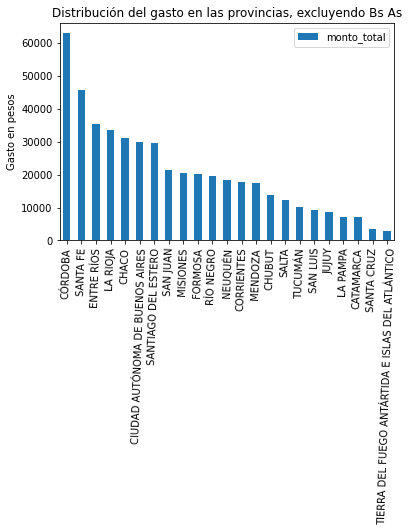

In [79]:
df_biv1 = df_biv1[df_biv1.provincia != "BUENOS AIRES"]
df_biv1.sort_values('monto_total', ascending=False).plot(kind='bar',x='provincia',y='monto_total', rot=88)
plt.title("Distribución del gasto en las provincias, excluyendo Bs As")
plt.xlabel("")
plt.ylabel("Gasto en pesos")

# Fecha inicio vs Fecha fin

In [80]:
# Convertimos a tipo fecha
_df = df.copy()
_df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'])
_df['fecha_fin'] = pd.to_datetime(df['fecha_fin'])

In [81]:
# Comparamos los valores
_df[_df["fecha_inicio"] > _df["fecha_fin"]][["proyecto_id","nombre_obra","fecha_inicio","fecha_fin","numero_obra"]]

,proyecto_id,nombre_obra,fecha_inicio,fecha_fin,numero_obra
20,165471,RED SECUNDARIA CLOACAL BARRIO ROLDÁN,2021-01-01,2016-01-31,71


/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_76895/3446495427.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


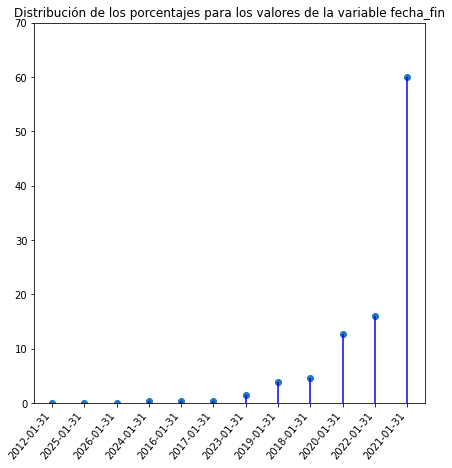

In [82]:
draw_distr(df, "fecha_fin",maxy=70)

# Veamos como correlaciona las etapas de las obras con fecha_fin

# Estado obra vs fecha fin = 2021

In [83]:
#%run estado_obra_vs_fecha_inicio.ipynb

In [84]:
import seaborn as sns

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_76895/3446495427.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


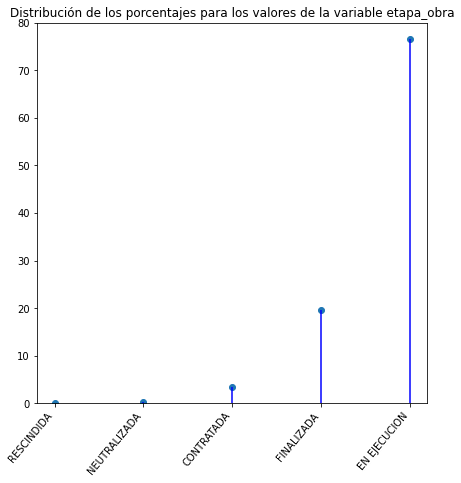

In [85]:
_df = df.copy()
#_df["fecha_fin"] = pd.to_datetime(_df["fecha_fin"])

_df = _df[_df["fecha_fin"] == "2021-01-31"]
draw_distr(_df, "etapa_obra", maxy=80)
#_df = _df[["etapa_obra_num","avance_fisico"]]
#sns.heatmap(_df, annot=True)


# Análisis bivariado: provincia vs etapa obra

<AxesSubplot:xlabel='provincia'>

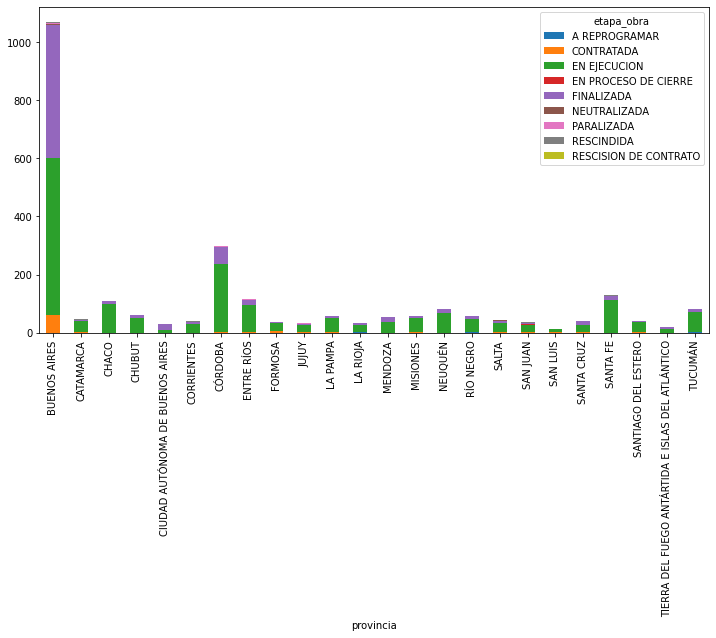

In [86]:
_df = df.copy()
_df_agg = _df.groupby(["provincia","etapa_obra"])["etapa_obra"].count().unstack().fillna(0)
_df_agg.columns
_df_agg.plot(kind='bar', stacked=True, figsize=(12,6))

<AxesSubplot:xlabel='etapa_obra', ylabel='Porcentaje de avance'>

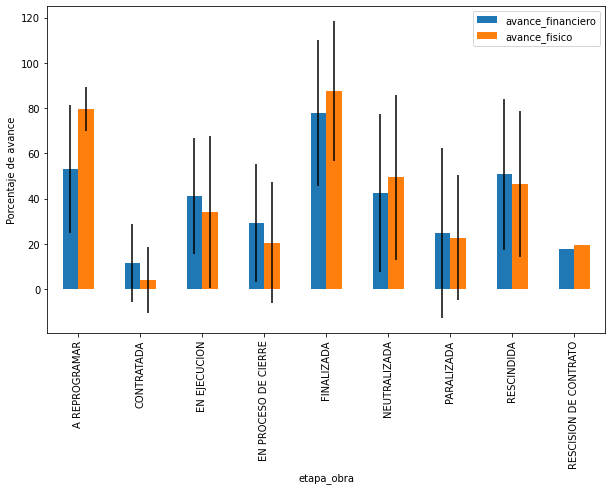

In [87]:
_df = df.copy()
#_df_agg = _df.groupby(["provincia","etapa_obra"])["etapa_obra"].count().unstack().fillna(0)
#_df[_df["etapa_obra"] == "EN EJECUCION"]]
_res = pd.DataFrame(columns=['avance_financiero','avance_fisico'])
_res["avance_financiero"] = _df.groupby("etapa_obra")["avance_financiero"].mean()
_res["avance_fisico"] = _df.groupby("etapa_obra")["avance_fisico"].mean()
#_res["X"] = set(_df["etapa_obra"])
errors = _df.groupby("etapa_obra").std()
_res.plot(kind="bar", y=["avance_financiero", "avance_fisico"], figsize=(10,6), ylabel="Porcentaje de avance", yerr=errors)
#_df_agg.plot(kind="bar", x="etapa_obra", y=["avance_financiero", "avance_fisico"], ylabel="Promedio de Avance financiero")
#_df_agg2.plot.bar(ylabel="Promedio de Avance financiero")


# Análisis bivariado: tipo proyecto vs monto total

In [88]:
_df = df.copy()

In [89]:
# Necesitamos cuánto se dio para cada provincia
df_biv1 = _df[["monto_total", "tipo_proyecto"]]
df_biv1 = df_biv1.groupby(['tipo_proyecto'], as_index=False).sum()
df_biv1["monto_total"] = df_biv1["monto_total"] / 1000000

Text(0, 0.5, 'Gasto en millones (pesos)')

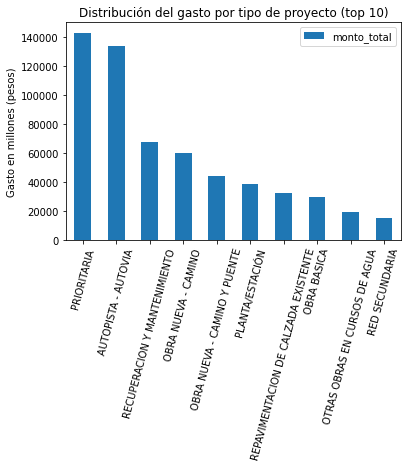

In [90]:
df_biv1.sort_values('monto_total', ascending=False).nlargest(10, "monto_total").plot(kind='bar',x='tipo_proyecto',y='monto_total', rot=75)
plt.title("Distribución del gasto por tipo de proyecto (top 10)")
plt.xlabel("")
plt.ylabel("Gasto en millones (pesos)")

Text(0, 0.5, 'Gasto en millones (pesos)')

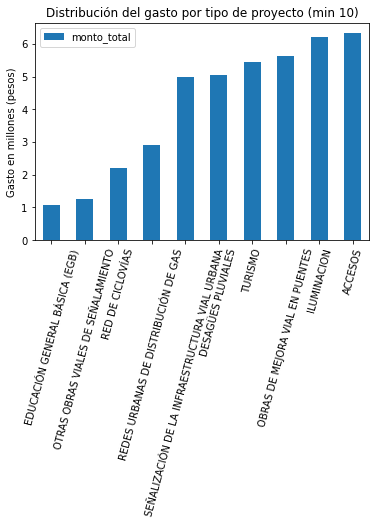

In [91]:
df_biv1.sort_values('monto_total', ascending=True).nsmallest(10, "monto_total").plot(kind='bar',x='tipo_proyecto',y='monto_total', rot=75)
plt.title("Distribución del gasto por tipo de proyecto (min 10)")
plt.xlabel("")
plt.ylabel("Gasto en millones (pesos)")

In [92]:
df[df["entidad_ejecutora_id"]<1001][["objetivo_general", "entidad_ejecutora_nombre", "entidad_ejecutora_id"]]

,objetivo_general,entidad_ejecutora_nombre,entidad_ejecutora_id
690,Ampliacion o Restauracion,NaN,1000
691,Luminarias,NaN,1000
692,Edificios Públicos,NaN,1000
693,Ampliacion o Restauracion,NaN,1000
694,Ampliacion o Restauracion,NaN,1000
...,...,...,...
756,Carpeta asfaltica,NaN,1000
757,Pavimentación,NaN,1000
758,Intertrabado,NaN,1000
759,Cordón Cuneta,NaN,1000


In [93]:
df[df["entidad_ejecutora_id"]==1000][["objetivo_general", "entidad_ejecutora_nombre", "entidad_ejecutora_id", "proyecto_id", "sector_nombre"]]

,objetivo_general,entidad_ejecutora_nombre,entidad_ejecutora_id,proyecto_id,sector_nombre
690,Ampliacion o Restauracion,NaN,1000,152003009,ARQUITECTURA
691,Luminarias,NaN,1000,152016012,ARQUITECTURA
692,Edificios Públicos,NaN,1000,152024009,ARQUITECTURA
693,Ampliacion o Restauracion,NaN,1000,152025004,ARQUITECTURA
694,Ampliacion o Restauracion,NaN,1000,152025005,ARQUITECTURA
...,...,...,...,...,...
756,Carpeta asfaltica,NaN,1000,155119007,OBRAS VIALES
757,Pavimentación,NaN,1000,155122009,OBRAS VIALES
758,Intertrabado,NaN,1000,155125005,OBRAS VIALES
759,Cordón Cuneta,NaN,1000,155128005,OBRAS VIALES


# Codigo Bapin

In [94]:
res = df.groupby("codigo_bapin")["proyecto_id"].apply(lambda x: x.unique()).reset_index()
res["cantidad_valores"] = res["proyecto_id"].str.len()
res = res.nlargest(10, "cantidad_valores")
res
#draw_distr(df, "codigo_bapin")

,codigo_bapin,proyecto_id,cantidad_valores
405,126511,"[1003105102, 1003105106, 1003105108, 100310510...",708
403,124292,"[1003105103, 1003105104, 1003105128, 100310512...",446
0,0000,"[1003308, 1003309, 1003311, 1003316, 1003317, ...",410
390,123721,"[1003111772, 1003111779, 1003111780, 100311178...",59
225,109353,"[10012178, 10012295, 10012755, 10012998, 10013...",54
402,124271,"[1003105256, 1003105284, 1003105356, 100310535...",18
420,128407,"[1003142642, 1003142795, 1003142806, 100314281...",11
79,107769,"[1003101850, 1003101856, 1003101857, 100310187...",9
185,109076,"[10012814, 10013216, 10013221, 10013312, 10013...",7
419,128312,"[1003105146, 1003105147, 1003105148, 100310514...",6


<AxesSubplot:xlabel='codigo_bapin', ylabel='Obras asociadas'>

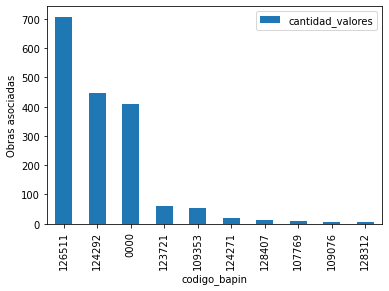

In [95]:
res.plot.bar(x="codigo_bapin", ylabel="Obras asociadas")


# Numero saf

<AxesSubplot:xlabel='numero_saf', ylabel='Obras asociadas'>

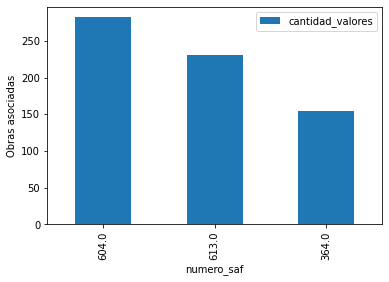

In [96]:
res = df.groupby("numero_saf")["proyecto_id"].apply(lambda x: x.unique()).reset_index()
res["cantidad_valores"] = res["proyecto_id"].str.len()
res = res.nlargest(10, "cantidad_valores")
res.plot.bar(x="numero_saf", ylabel="Obras asociadas")

# Codigo Bahra

<AxesSubplot:xlabel='codigo_bahra', ylabel='Obras asociadas'>

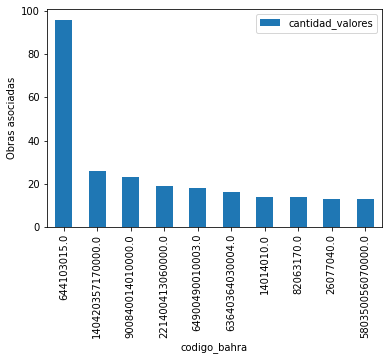

In [97]:
res = df.groupby("codigo_bahra")["proyecto_id"].apply(lambda x: x.unique()).reset_index()
res["cantidad_valores"] = res["proyecto_id"].str.len()
res = res.nlargest(10, "cantidad_valores")
res.plot.bar(x="codigo_bahra", ylabel="Obras asociadas")

# Remediacion codigo bahra

In [98]:
df[df["codigo_bahra"].isnull()][["objetivo_general", "entidad_ejecutora_nombre", "entidad_ejecutora_id", "proyecto_id", "sector_nombre", "provincia", "depto", "codigo_bahra"]]
df_bahra_null = df[df["codigo_bahra"].isnull()]

In [99]:
df_bahra_null["codigo_bahra"] = df.apply(lambda x: get_bahra_code(x["provincia"], x["depto"]) if pd.isna(x["codigo_bahra"]) else x["codigo_bahra"], axis=1)

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_76895/1938385493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bahra_null["codigo_bahra"] = df.apply(lambda x: get_bahra_code(x["provincia"], x["depto"]) if pd.isna(x["codigo_bahra"]) else x["codigo_bahra"], axis=1)


# Analizando la distribucion de codigo_bahra después de la remediacion

<AxesSubplot:xlabel='codigo_bahra', ylabel='Obras asociadas'>

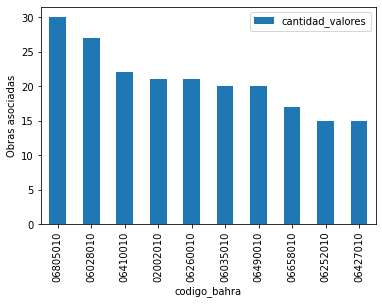

In [103]:
res = df_bahra_null.groupby("codigo_bahra")["proyecto_id"].apply(lambda x: x.unique()).reset_index()
res = res[res["codigo_bahra"] != "not enough localidades for CIUDAD AUTÓNOMA DE BUENOS AIRES - CIUDAD AUTÓNOMA DE BUENOS AIRES"]
res["cantidad_valores"] = res["proyecto_id"].str.len()
res = res.nlargest(10, "cantidad_valores")
res.plot.bar(x="codigo_bahra", ylabel="Obras asociadas")

# Analizando los valores que no pudimos remediar

In [105]:
_df_bahra_null = df_bahra_null[df_bahra_null["codigo_bahra"].str.contains("not enough")]
_df_bahra_null[["proyecto_id","numero_obra","provincia","depto"]]


,proyecto_id,numero_obra,provincia,depto
153,1007631,631,BUENOS AIRES,GENERAL SAN MARTÍN
940,1003105284,105284,BUENOS AIRES,GENERAL SAN MARTÍN
985,1003105358,105358,BUENOS AIRES,GENERAL SAN MARTÍN
1515,1003109326,109326,TIERRA DEL FUEGO ANTÁRTIDA E ISLAS DEL ATLÁNTICO,USHUAIA
2463,1003203767,203767,BUENOS AIRES,GENERAL SAN MARTÍN


# Comparando los valores de objetivo_general y descripcion_fisica

In [106]:
values_for_pair(df, "objetivo_general", "descripcion_fisica")

,objetivo_general,descripcion_fisica,cantidad_valores
0,(Desde el punto de vista de obra vial: ejecuta...,[(Desde el punto de vista de obra vial: ejecut...,1
1,* Mejorar la infraestructura urbana del secto...,[* Mejorar la infraestructura urbana del sect...,1
2,* Brindar al público en general de un servicio...,[* Brindar al público en general de un servici...,1
3,* Brindar mayor conectividad en los diferentes...,[* Brindar mayor conectividad en los diferente...,1
4,* Conectar de manera segura los barrios del se...,[* Conectar de manera segura los barrios del s...,1
...,...,...,...
1977,\tObjetivos del proyecto: La intervención se ...,[\tObjetivos del proyecto: La intervención se...,1
1978,\tPoner en valor e integrar el área de Paso C...,[\tPoner en valor e integrar el área de Paso ...,1
1979,\tPoner en valor estético-cultural al acceso ...,[\tPoner en valor estético-cultural al acceso...,1
1980,\tRecuperar y revalorizar infraestructuras so...,[\tRecuperar y revalorizar infraestructuras s...,1
